# importing important selennium modules

In [1]:
from datetime import date
# impoting requests module  to send HTTP requests using Python
import requests
from bs4 import BeautifulSoup
import pandas as pd
#re stands for regular expression which specifies a set of strings that matches it.
import re
import time
#Display a Python object in all frontends. 
from IPython.display import clear_output
#random module in Python defines a series of functions for generating or manipulating random integers. 
import random
#most common exceptions in Selenium WebDriver, and it is thrown when an HTML element cannot be found.
from selenium.common.exceptions import NoSuchElementException

from selenium import webdriver
#ChromeOptions() for manipulating various properties of the Chrome driver
options = webdriver.ChromeOptions()
#to avoid the situation if the security code is outdated and in result users will not be allowed to access that website
options.add_argument('--ignore-certificate-errors')
#we added icognito to prevent the popping of login page
options.add_argument('--incognito')
#to browser open with UI
options.add_argument('--headless')
from webdriver_manager.chrome import ChromeDriverManager
driver = webdriver.Chrome(executable_path='C:/Users/ASUS\Downloads/chromedriver.exe')

C:\Users\ASUS\AppData\Local\Temp/ipykernel_22668/983300019.py:26: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path='C:/Users/ASUS\Downloads/chromedriver.exe')


Removing all the spaces from the string 

In [2]:
list_jobs=["Cloud Solutions Architect","Software Architect","Network Architect","Software Applications Architect","Data Architect","Solutions Architect","Site Reliability Engineer","Computer and Information Research Scientist","Data Scientist","Development Operations Engineer","IT Operations Manager","Data Engineer","IT Project Manager","Information Technology Manager","Hardware Engineer","Senior Web Developer","Software Engineer","Computer Hardware Engineer","Wireless RF Network Engineer","Information Systems Manager","Computer Scientist","Business Intelligence Developer","Ethical Hacker","IT Systems Engineer","Database Developer","Network Engineer","Mobile Applications Developer","Software Developer","Application Developer","Computer Systems Analyst","IT Business Analyst","Web Developer","Network Administrator","Network and Computer System Administrator","Data Manager","User Interface Designer","Computer Programmer","PHP Developer","Applications Programmer","Data Security Analyst","Video Game Designer","Systems Analyst","IT Security Administrator","Computer Security Specialist","Information Technology Auditor"]
list1=[]
today =str(date.today())
for i in list_jobs:
      for j in i:
        if j==" ":
            i=i.replace(" ","-")
            list1.append(i)
myFinalList = pd.unique(list1).tolist()
list1=myFinalList

automating web search and scraping data from naukri .com

In [3]:
linkstart="https://www.naukri.com/"
for x in range(0,20):
    Link=[]
    for page in range(0,2): #first two pages of the naukri.com search
        driver.get(linkstart+list1[x]+"-jobs-in-bangalore-"+str(page))
        timeDelay = random.randrange(0,15)
        time.sleep(timeDelay) 
        soup=BeautifulSoup(driver.page_source, 'lxml')#returns html of the page
        for i in soup.findAll(attrs={'class':"jobTuple bgWhite br4 mb-8"}):
            for j in i.findAll(attrs={'class':"title fw500 ellipsis"}):
                Link.append(j.get('href')) #stores all the link of the job postings
    len(Link) #total link
    #these were all the columns we got from naukri.com and made empty list 
    salary=[]
    experience=[]
    Location=[]
    description=[]
    role=[]
    industry_type=[]
    qualification=[]
    Functional_area=[]
    Employment_type=[]
    Role_category=[]
    company=[]
    skills=[]
    for lin in range(len(Link)):
        driver.get(Link[lin])
        #time.sleep(1)
        soup=BeautifulSoup(driver.page_source, 'lxml') 
        if soup.find(attrs={'class':"salary"})==None: #to skip the error
            continue
        else:
            experience.append(soup.find(attrs={'class':"exp"}).text)
            salary.append(soup.find(attrs={'class':"salary"}).text)
            Location.append(soup.find(attrs={'class':'loc'}).find('a').text)
            description.append(soup.find(attrs={'class':"job-desc"}).text)
            details=[]
            for i in soup.find(attrs={'class':"other-details"}).findAll(attrs={'class':"details"}):
                details.append(i.text)
            role.append(details[0])
            industry_type.append(details[1])
            Functional_area.append(details[2])
            Employment_type.append(details[3])
            Role_category.append(details[4])
            qual=[]
            for i in soup.find(attrs={'class':"education"}).findAll(attrs={'class':'details'}):
                qual.append(i.text)
            qualification.append(qual)
            sk=[]
            for i in soup.find(attrs={'class':"key-skill"}).findAll('a'):
                sk.append(i.text)
            skills.append(sk)
            company.append(soup.find(attrs={'class':"about-company"}).find(attrs={'class':"detail dang-inner-html"}).text)
    df=pd.DataFrame()
    df['company']=company
    df['role']=role
    df['salary']=salary
    df['experience']=experience
    df['Location']=Location
    df['description']=description
    df['skills']=skills
    df['qualification']=qualification
    df['industry_type']=industry_type
    df['Functional_area']=Functional_area
    df['Employment_type']=Employment_type
    df['Role_category']=Role_category
    len(df)
    df.head()
    df.to_csv(list1[x]+'.csv',index=False)
    Link.clear()
print(df)    

WebDriverException: Message: disconnected: Unable to receive message from renderer
  (failed to check if window was closed: timeout: Timed out receiving message from renderer: 600.000)
  (Session info: chrome=107.0.5304.88)
Stacktrace:
Backtrace:
	Ordinal0 [0x00751ED3+2236115]
	Ordinal0 [0x006E92F1+1807089]
	Ordinal0 [0x005F66FD+812797]
	Ordinal0 [0x005E94BB+758971]
	Ordinal0 [0x005E92C1+758465]
	Ordinal0 [0x005E8113+753939]
	Ordinal0 [0x005E861D+755229]
	Ordinal0 [0x005E7D25+752933]
	Ordinal0 [0x005F2083+794755]
	Ordinal0 [0x005E7CD5+752853]
	Ordinal0 [0x005E8EE6+757478]
	Ordinal0 [0x005E8113+753939]
	Ordinal0 [0x005E861D+755229]
	Ordinal0 [0x005E7D25+752933]
	Ordinal0 [0x005EFBB8+785336]
	Ordinal0 [0x005E7CD5+752853]
	Ordinal0 [0x005E8EE6+757478]
	Ordinal0 [0x005E8113+753939]
	Ordinal0 [0x005E861D+755229]
	Ordinal0 [0x005E7D25+752933]
	Ordinal0 [0x005ED5C2+775618]
	Ordinal0 [0x005E7CD5+752853]
	Ordinal0 [0x005E8EE6+757478]
	Ordinal0 [0x005E8113+753939]
	Ordinal0 [0x005E861D+755229]
	Ordinal0 [0x005E7D25+752933]
	Ordinal0 [0x005E2F2D+732973]
	Ordinal0 [0x005E7CD5+752853]
	Ordinal0 [0x005E8EE6+757478]
	Ordinal0 [0x005E8113+753939]
	Ordinal0 [0x005E861D+755229]
	Ordinal0 [0x005E7D25+752933]
	Ordinal0 [0x005F2083+794755]
	Ordinal0 [0x005E7CD5+752853]
	Ordinal0 [0x005E8EE6+757478]
	Ordinal0 [0x005E8113+753939]
	Ordinal0 [0x005E861D+755229]
	Ordinal0 [0x005E7D25+752933]
	Ordinal0 [0x005EFBB8+785336]
	Ordinal0 [0x005E7CD5+752853]
	Ordinal0 [0x005E8EE6+757478]
	Ordinal0 [0x005E8113+753939]
	Ordinal0 [0x005E861D+755229]
	Ordinal0 [0x005E7D25+752933]
	Ordinal0 [0x005ED5C2+775618]
	Ordinal0 [0x005E7CD5+752853]
	Ordinal0 [0x005E74FD+750845]
	Ordinal0 [0x005E75ED+751085]
	Ordinal0 [0x005E791A+751898]
	Ordinal0 [0x005E77D8+751576]
	Ordinal0 [0x005F7B63+818019]
	Ordinal0 [0x0065518A+1200522]
	Ordinal0 [0x006418A6+1120422]
	Ordinal0 [0x0061A73D+960317]
	Ordinal0 [0x0061B71F+964383]
	GetHandleVerifier [0x009FE7E2+2743074]
	GetHandleVerifier [0x009F08D4+2685972]
	GetHandleVerifier [0x007E2BAA+532202]
	GetHandleVerifier [0x007E1990+527568]
	Ordinal0 [0x006F080C+1837068]
	Ordinal0 [0x006F4CD8+1854680]
	Ordinal0 [0x006F4DC5+1854917]
	Ordinal0 [0x006FED64+1895780]
	BaseThreadInitThunk [0x76F3FA29+25]
	RtlGetAppContainerNamedObjectPath [0x779F7BBE+286]
	RtlGetAppContainerNamedObjectPath [0x779F7B8E+238]


In [5]:
import pandas as pd
from datetime import date

Converting space containing strings to hyphen containing strings 

In [6]:
list_jobs=["Cloud Solutions Architect","Software Architect","Network Architect","Software Applications Architect","Data Architect","Solutions Architect","Site Reliability Engineer","Computer and Information Research Scientist","Data Scientist","Development Operations Engineer","IT Operations Manager","Data Engineer","IT Project Manager","Information Technology Manager","Hardware Engineer","Senior Web Developer","Software Engineer","Computer Hardware Engineer","Wireless RF Network Engineer","Information Systems Manager","Computer Scientist","Business Intelligence Developer","Ethical Hacker","IT Systems Engineer","Database Developer","Network Engineer","Mobile Applications Developer","Software Developer","Application Developer","Computer Systems Analyst","IT Business Analyst","Web Developer","Network Administrator","Network and Computer System Administrator","Data Manager","User Interface Designer","Computer Programmer","PHP Developer","Applications Programmer","Data Security Analyst","Video Game Designer","Systems Analyst","IT Security Administrator","Computer Security Specialist","Information Technology Auditor"]
list1=[]
for i in list_jobs:
      for j in i:
        if j==" ":
            i=i.replace(" ","-")
            list1.append(i)
myFinalList = pd.unique(list1).tolist()
list1=myFinalList
today =str(date.today())

printing one of the csv that we just made from web scraping

In [7]:
print(df)

                                              company  \
0                   Replicon Software (India) Pvt Ltd   
1   Founded in 1976, CGI is among the largest IT a...   
2   Universal Manpower Online aims to provide qual...   
3   Universal Manpower Online aims to provide qual...   
4    Pippin is a real estate tech start-up special...   
5   The Manufacturers of India's leading watch bra...   
6   VARITE is a global IT company providing softwa...   
7   TALENT ZONE Consultants is a unique and flouri...   
8                      Altem Technologies (P) Limited   
9   We,  at NIRAMAI,  are developing a novel softw...   
10  Alliance University is a Private University es...   
11             Srishti Software Applications Pvt. Ltd   
12                                               RCPC   
13                                     Education Firm   
14                                     Leading Client   
15                                     Leading Client   
16                             

extracting important information from the scraped data

In [8]:
c=0
for i in range(0,20,1):    
    df1=pd.read_csv(list1[i]+".csv")
    df2=pd.read_csv(list_jobs[i]+".csv")
    new_row = {'skills/dates':today}
    #inserting a new row which will contain the scraped data of the particular day.
    df2 = df2.append(new_row, ignore_index=True)
    #lip will contain list of all the skills
    lip=list(df2.columns.values)
    st1=df1["skills"]
    l1=list(st1)
    for j in range(1,11,1):
        st2=lip[j]
        print(st2)
        for k in range(0,len(l1)):
            st=l1[k]
            st = list(map(lambda x: x.replace("'", "").strip(), st[1:-1].split(",")))#have to read
            if(st2 in st):
                c=c+1
        df2[st2][len(df.axes[0])]=c
        print(c)
        c=0

SQL
2
Python
6
azure
6
Networking
2
HTML/CSS Markup
0
Oracle
8
Linux
4
Cloud Architecture
2
Communication
0
aws 
0
cloud computing
0
SQL
4
MongoDB
2
Javascript
5
Python
12
Azure
2
Ux Design
0
NodeJS
2
Agile
0
AWS
2
Python
4
Routing
2
Cisco
0
Perl
0
Aruba
0
HTML
2
C++
2
Agile
2
VPN
4
Linux
4
Software Applications Architect
0
Azure
2
NoSQL
2
SQL
0
Agile
2
Linux
4
Architecture
10
Javascript
2
Python
2
c++
0
Informatica
4
SQL
12
Big Data
4
Cassandra
0
AWS
2
Data Modeling
2
XML
0
Scrum
0
Troubleshooting
0
Linux
4
Big Data
0
HTTP
0
Web Development
0
JavaScript
0
APEX
0
Ajax
0
Cyber Security
0
Oracle
0
HTML
0
C++
0
10/26/2022
0
Site Reliability Engineer
0
Azure
0
AWS
4
Python
20
Java
4
DevOps
2
Javascript
2
Linux
8
Debugging
4
Java
4
python
2
Networking
2
angular
0
javascript
0
c++
0
Azure
2
Front End
0
Pandas
0
sql
2
Python
26
SQL
6
Linux
2
MongoDB
0
Azure
2
SQL.1
0
Oracle
2
C++
0
Perl
2
Ruby
2
Linux
10
aws
2
Unix
4
Oracle
4
Python
12
Maven
4
Java
2
Cloud
4
Devops
2
Scrum
2
linux
0
Python
2


C:\Users\ASUS\AppData\Local\Temp/ipykernel_17792/970967865.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[st2][len(df.axes[0])]=c



HTML
0
DevOps
0
CSS
0
Management
3
NoSQL
1
Linux
1
RDBMS
1
SQL
1
aws
0
sql
0
data security
0
Data analysis
1
azure
0
C++
1
Python
3
VLSI design
1
PCB
2
Circuit Design
2
Hardware Design
1
ASIC
1
SOC
0
Test Automation
0
PCIE
3
Css
0
PHP
22
Ajax
6
Javascript
26
html
6
jquery
2
MySQL
14
Linux
14
Apache
8
Node.Js
2
Java
6
Agile
2
Front end
0
jQuery
0
Oracle
4
Python
6
C++
0
Javascript
4
AWS
6
Ruby
0
MCSE
4
MPLS
2
LAN
4
Linux
6
networking
2
Perl
2
Network troubleshooting
2
Javascript
2
Python
4
ORCAD
0
cisco
4
Front end
2
Python
17
Perl
0
Networking
27
OSPF
2
Linux
4
Java
15
C++
15
Web Designing
15
ERP
2
Excel
4
Data Analysis
2
Rostering
4
Budgeting
4
CGI
2
Macros
6
MIS
6
MS Office
5
data analysis
2


C:\Users\ASUS\AppData\Local\Temp/ipykernel_4040/2311206715.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['skills/dates'] = pd.to_datetime(df2['skills/dates'])
C:\Users\ASUS\AppData\Local\Temp/ipykernel_4040/2311206715.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['n'] = df2['skills/dates'].dt.date #new column which will contain only dates and n


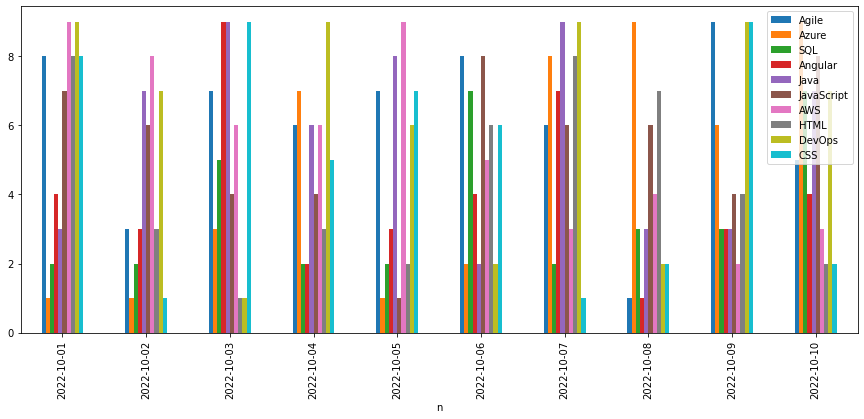

In [11]:
df2=df.head(10)
# skills/dates is taken as string here so we will make it in date format.
# The object to convert to a datetime.
df2['skills/dates'] = pd.to_datetime(df2['skills/dates'])
#to return the date property of the underlying data of the given Series object.
df2['n'] = df2['skills/dates'].dt.date #new column which will contain only dates and n

fig, ax = plt.subplots(figsize=(15,6))
del df2['skills/dates']
df2.set_index('n').plot(kind='bar',ax=ax)
plt.show()

from the above grapgh we were able to know that everyday the trend was different of every skill

In [3]:
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_csv("IT Project Manager.csv",parse_dates=True)

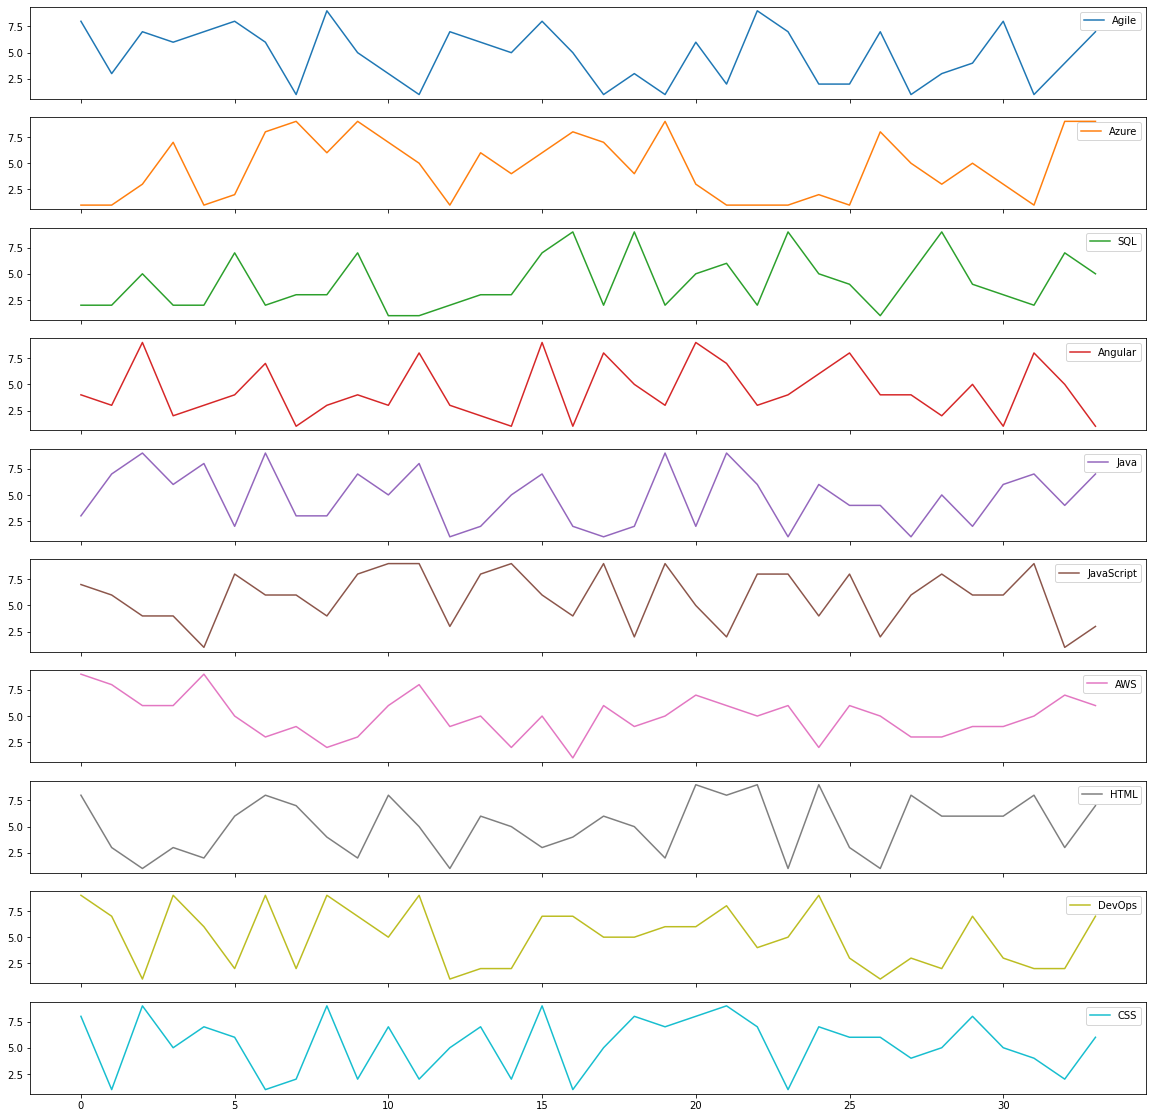

In [5]:
df.plot(subplots=True,figsize=(20,20));

the above line grapgh showed peaks and drop in demand of different skills

<AxesSubplot:>

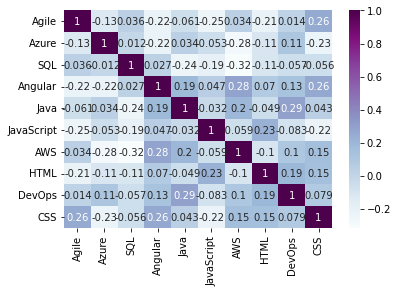

In [12]:
correlation = df.corr()
sns.heatmap(correlation, cmap="BuPu", annot=True)

we tried to find corelation between and two skills but were not able to find  and so we concluded that no two skills were demendent on each other

<AxesSubplot:>

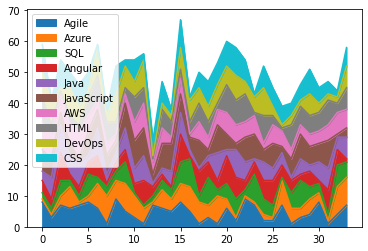

In [7]:
figsize=(10, 20)
df.plot.area()

to show changes in quantities over time we used the above area plot

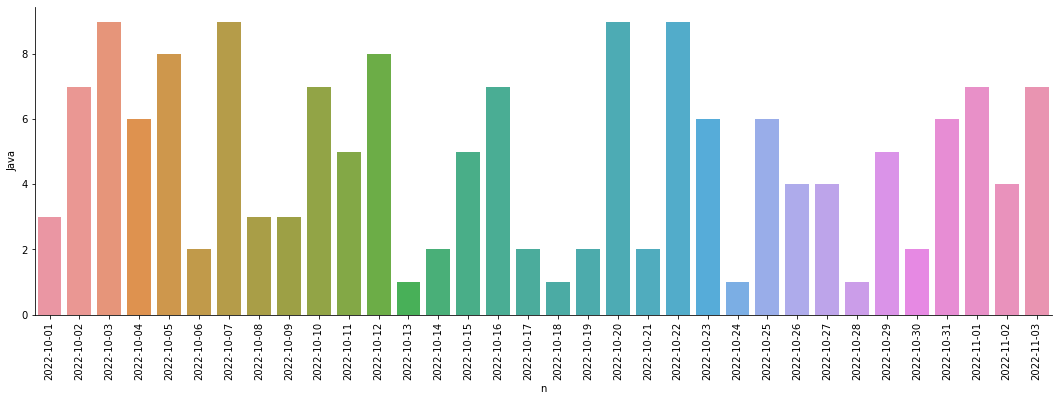

In [8]:
df['skills/dates'] = pd.to_datetime(df['skills/dates'])
df['n'] = df['skills/dates'].dt.date #new column which will contain only dates and no timestamp
sns.catplot(x='n',y='Java',data=df,kind='bar',aspect=3)
plt.xticks(rotation=90);

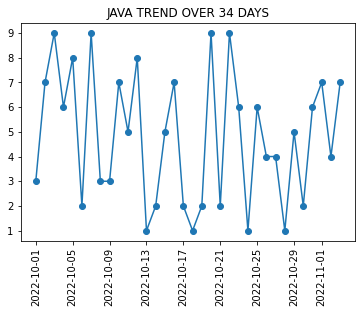

In [9]:
plt.plot('skills/dates', 'Java', data=df, linestyle='-', marker='o')
plt.xticks(rotation=90);
plt.title("JAVA TREND OVER 34 DAYS")
plt.show()

from the above grapgh were able to see the treand of a particular skill over the period of 34 days